### Search gradients

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.collections as mc 
import scipy

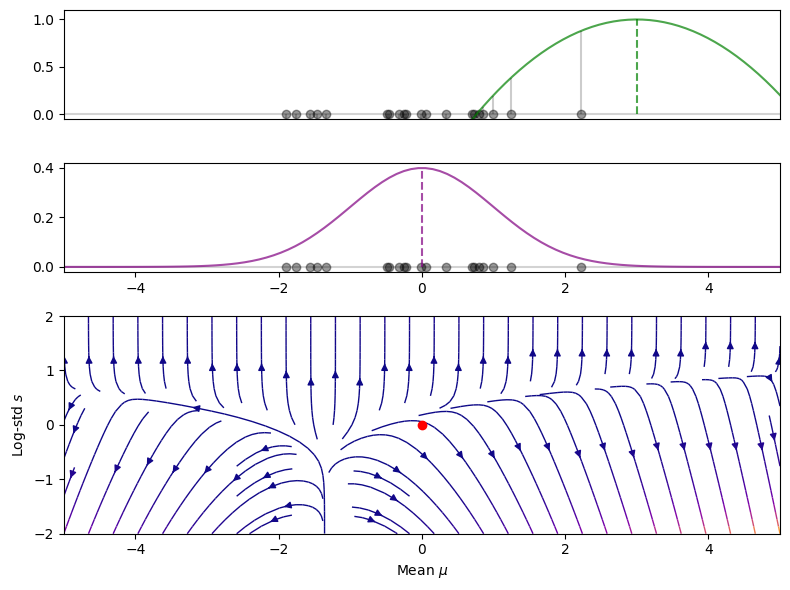

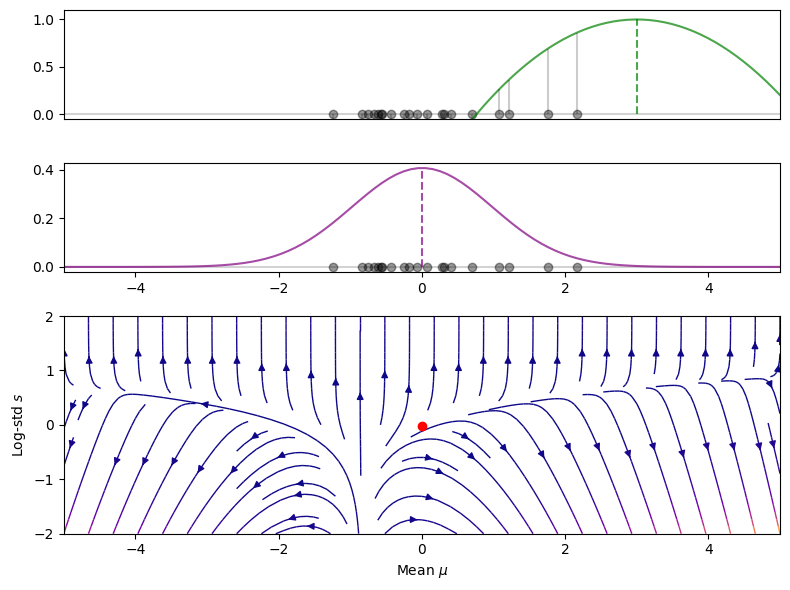

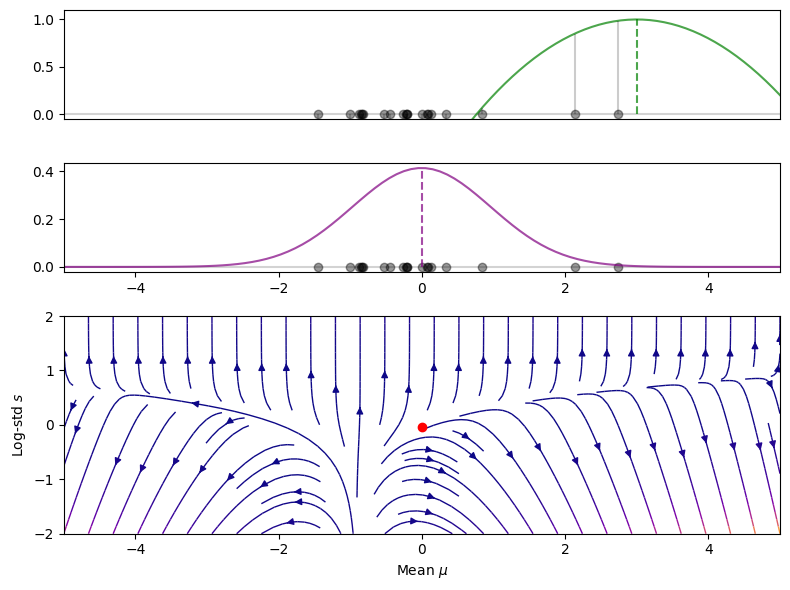

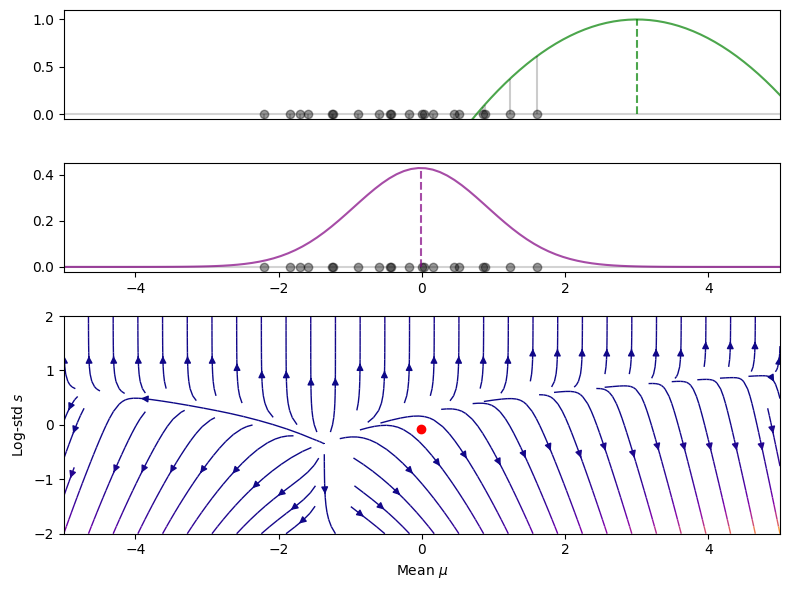

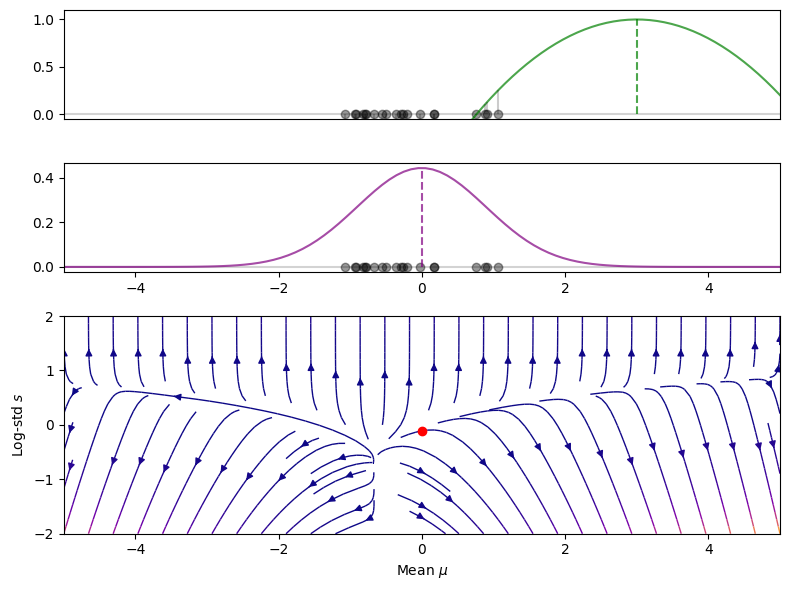

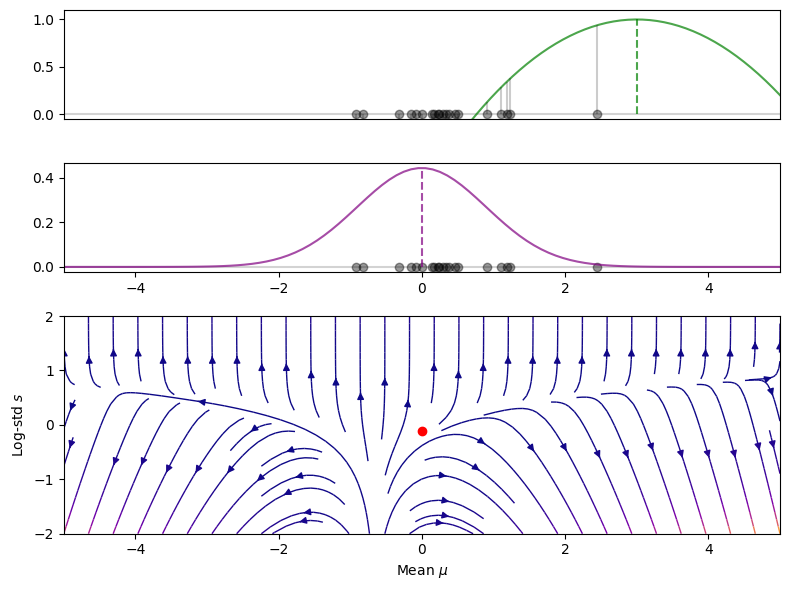

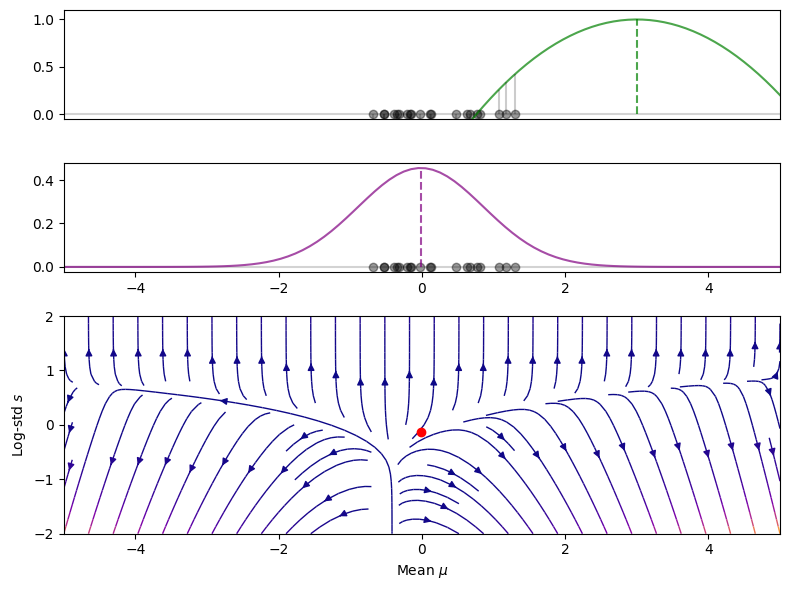

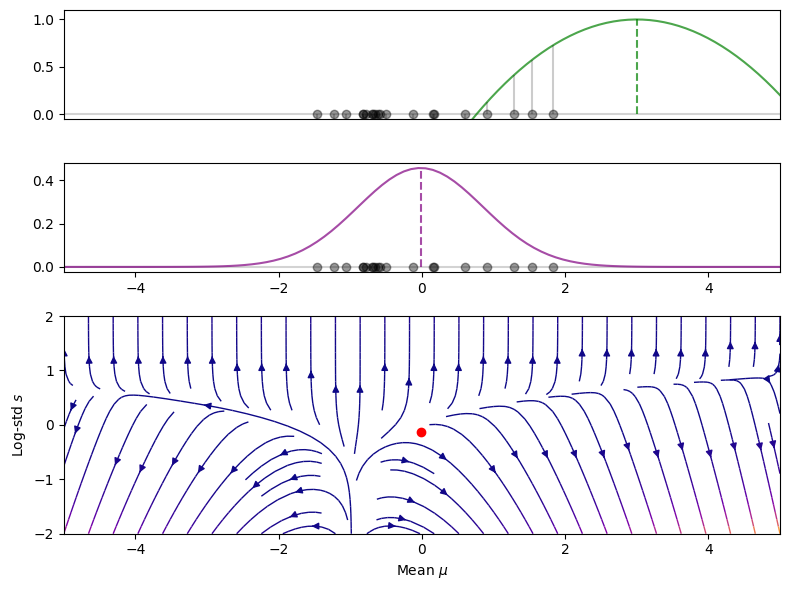

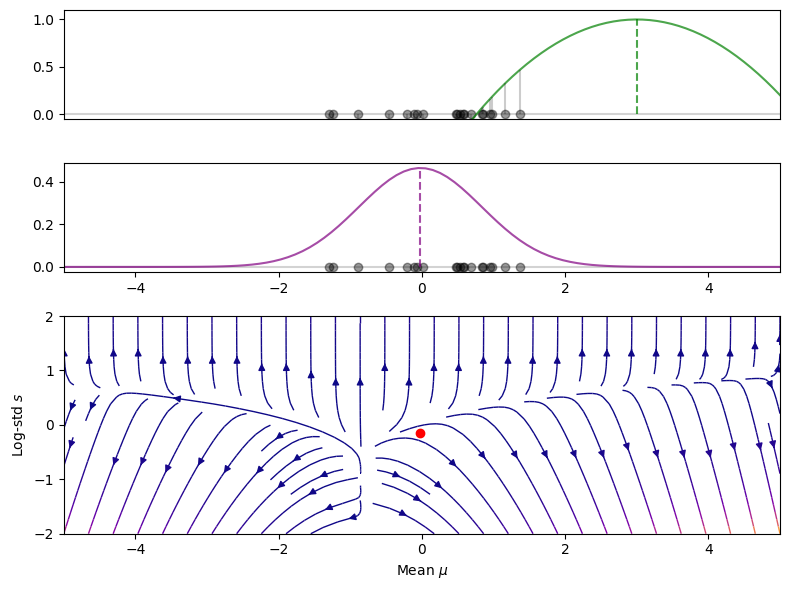

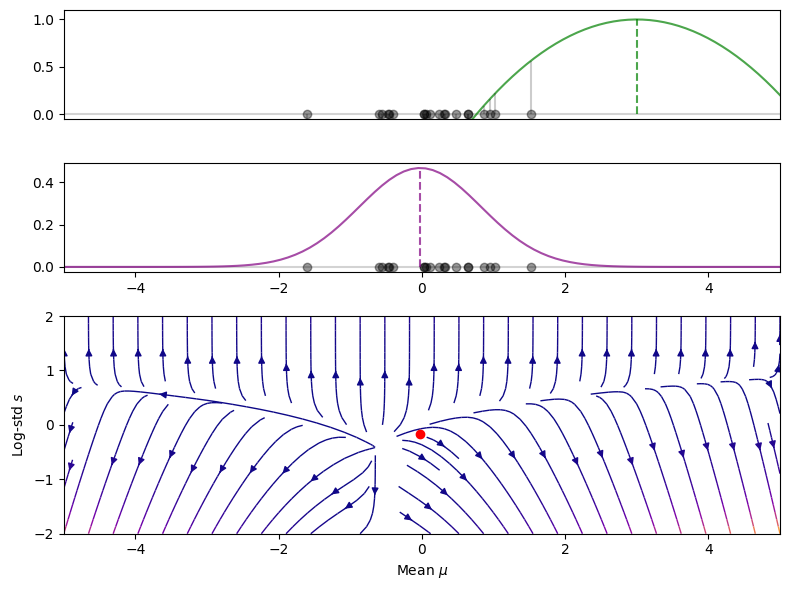

In [191]:
α = 0.1
β = 0.1

µ0 = 0
s0 = np.log(1)

for i in range(10):

    x = np.linspace(-5, 5, 100)
    p = scipy.stats.norm.pdf(x, loc=µ0, scale=np.exp(s0))
    
    x_opt = 3.0
    fitness_func = lambda _x: -0.2*(_x-x_opt)**2+1
    f = fitness_func(x)
    
    n_samples = 20
    samples = np.random.normal(µ0, np.exp(s0), n_samples)
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 6), height_ratios=[1, 1, 2])
    
    
    # Fitness
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-0.05, 1.1)
    ax1.set_yticks([0.0, 0.5, 1.0])
    # ax1.set_xticks([x_opt], labels=[r"$x^*$"])
    ax1.set_xticks([])
    ax1.axhline(0, color="lightgrey", zorder=-1)
    ax1.plot(x, f, color="green", alpha=0.7)
    ax1.add_collection(mc.LineCollection(
        [[(x_opt, 0), (x_opt, fitness_func(x_opt))]], 
        color="green", ls="--", alpha=0.7)
    )
    ax1.scatter(samples, np.zeros(n_samples), color="black", alpha=0.4);
    ax1.add_collection(mc.LineCollection(
        [[(x0, 0), (x0, fitness_func(x0))] for x0 in samples], 
        color="black", alpha=0.2)
    )
    
    
    # Search distribution
    ax2.set_xlim(-5, 5)
    ax2.axhline(0, color="lightgrey", zorder=-1)
    ax2.add_collection(mc.LineCollection(
        [[(µ0, 0), (µ0, scipy.stats.norm.pdf(µ0, loc=µ0, scale=np.exp(s0)))]], 
        color="purple", ls="--", alpha=0.7)
    )
    ax2.plot(x, p, color="purple", alpha=0.7)
    ax2.scatter(samples, np.zeros(n_samples), color="black", alpha=0.4);
    
    
    # Gradient field 
    µ_space = np.linspace(-5, 5, 100)
    s_space = np.linspace(-2, 2, 100)
    µ, s = np.meshgrid(µ_space, s_space)
    dJ_dµ = np.zeros_like(µ)
    dJ_ds = np.zeros_like(s)
    for x0 in samples:
        gµ = (x0-µ)/np.exp(2*s)
        gs = ((x0-µ)**2/np.exp(2*s))-np.exp(2*s)
        f = fitness_func(x0)
        dJ_dµ += 1/n_samples * gµ * f 
        dJ_ds += 1/n_samples * gs * f 
    grad_mag = np.sqrt(dJ_dµ**2 + dJ_ds**2)
    
    ax3.set_xlim(-5, 5)
    # ax3.axvline(mean, color="grey", ls="--", alpha=0.5, zorder=-1)
    ax3.streamplot(µ, s, dJ_dµ, dJ_ds, color=grad_mag, linewidth=1, cmap="plasma", zorder=0) 
    ax3.set_xlabel(r"Mean $\mu$")
    ax3.set_ylabel(r"Log-std $s$")
    # plt.colorbar(label="Gradient Magnitude")
    ax3.scatter([µ0], [s0], color="red", zorder=2);
    
    plt.tight_layout();

    # FIXME: 
    # Actually update the parameters
    f_samples = -samples**2
    # Score function gradients for each sample
    gµ_samples = (samples-µ0)/np.exp(2*s0)
    gs_samples = ((samples-µ0)**2)/np.exp(2*s0)**2-1
    # NES gradient estimates
    grad_µ = np.mean(gµ_samples * f_samples)
    grad_s = np.mean(gs_samples * f_samples)
    µ0 += α * grad_µ
    s0 += β * grad_s
    
    plt.savefig(f"{i}.png", dpi=500)